In [398]:
import numpy as np
import matplotlib.pyplot as plt
# import cupy as cp
import scipy
import random
plt.style.use('classic')


In [399]:
N = 100     #points
W = 0 /27211.6      #potential μ_B
L = 100     #length
delta_x = L/N   #width
alpha = 0.95*delta_x**2   #method parameter

ground state

In [408]:
Psi = np.random.uniform(-1, 1, N)
Psi_prim = np.zeros(N)
Psi[0] = Psi[N-1] = 0
I = 0
# J = np.linspace(0, 1, 1000*N)
energy = np.zeros(100*N)


for j in range(0, 100*N-1):
    I = 0
    for i in range(1, N-1): 
        Psi_prim[i] = Psi[i] - alpha* (-1/2 * 1  * (Psi[i+1] + Psi[i-1] - 2*Psi[i])/delta_x**2  + W*Psi[i])

    for i in range(1, N-1): 
        I = I + Psi_prim[i]**2 * delta_x

    for i in range(1, N-1):
        Psi_prim[i] = Psi_prim[i]/np.sqrt(I)
    for i in range(1, N-1):
        Psi[i] = Psi_prim[i]

    for i in range(1, N-1): 
        energy[j+1] = energy[j] + Psi[i] * (-1/2 * 1  * (Psi[i+1]+ Psi[i-1] - 2*Psi[i])/(delta_x**2) + W * Psi[i]) *delta_x

print(I)
print(energy)
# print(Psi)


    



0.9990436592843394
[0.         0.00218482 0.00450571 ... 0.01155368 0.01155369 0.0115537 ]


Text(0, 0.5, 'Ψ')

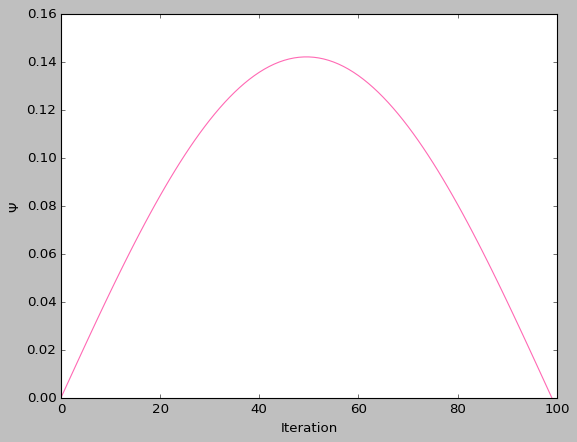

In [409]:
plt.subplot()
plt.plot(Psi ,color = 'hotpink')
plt.xlabel('Iteration')
plt.ylabel("Ψ")
# plt.plot(Psi_prim)
# print(len(Psi))

Text(0, 0.5, 'Energy [μ_B]')

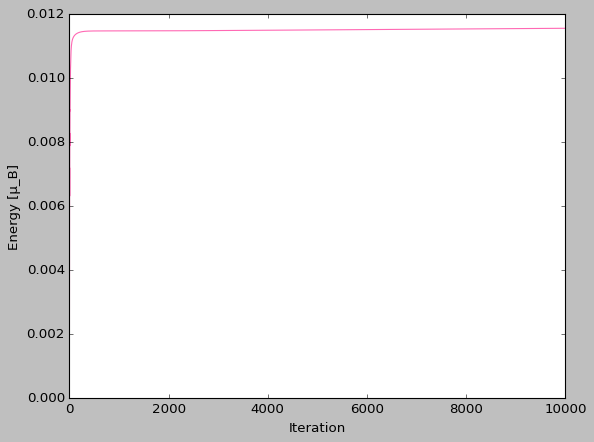

In [410]:
plt.plot(energy, color = 'hotpink')
plt.xlabel('Iteration')
plt.ylabel("Energy [μ_B]")

first exciteted state

In [403]:
Psi2 = np.random.uniform(-1, 1, N)
Psi2_prim = np.zeros(N)
Psi2[0] = Psi2[N-1] = 0
j = 0
c1 = 0
energy2 = np.zeros(N)


while j < 10000: #big go loop 
    for i in range(1, N-1): #small points loop 

        Psi2_prim[i] = Psi2[i] - alpha* (-1/2 * 1  * (Psi2[i+1] + Psi2[i-1] - 2*Psi2[i])/delta_x**2  + W*Psi2[i]) 
    
        c1 = c1 + Psi[i]*Psi2_prim[i]*delta_x

        Psi2_prim[i] = Psi2_prim[i] - c1*Psi[i]

        I = I + Psi2_prim[i]**2 * delta_x
        Psi2_prim[i]/np.sqrt(I)
        Psi2[i] = Psi2_prim[i]

        energy2[i+1] = energy2[i] + Psi2[i] * (-1/2 * 1  * (Psi2[i+1]+ Psi2[i-1] - 2*Psi2[i]) + W * Psi2[i]) *delta_x



    j = j+1

print(c1)


5.638427107357629e+105


Text(0, 0.5, 'Ψ')

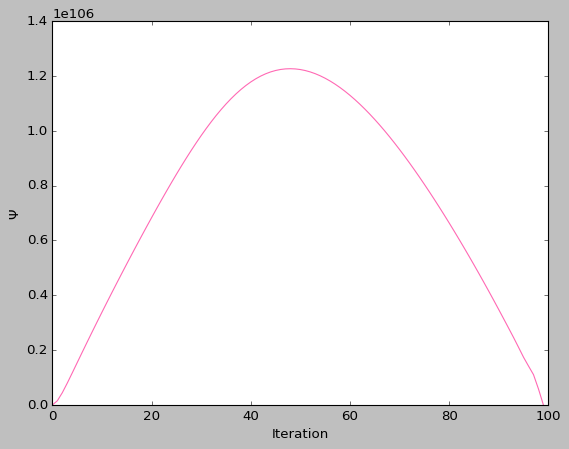

In [404]:
plt.plot(Psi2, color = 'hotpink')
plt.xlabel('Iteration')
plt.ylabel("Ψ")

Text(0, 0.5, 'Energy [μ_B]')

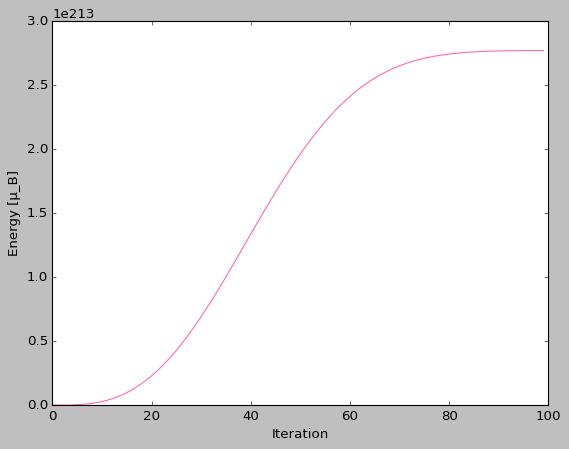

In [405]:
plt.plot(energy2, color = 'hotpink')
plt.xlabel('Iteration')
plt.ylabel("Energy [μ_B]")